In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from scipy.stats import pearsonr, ttest_ind


data = pd.read_csv("./widsdatathon2022/train.csv")
test = pd.read_csv("./widsdatathon2022/test.csv")

t-stat correlation: -12.586555813322724, p-value: 3.063107849840231e-36 



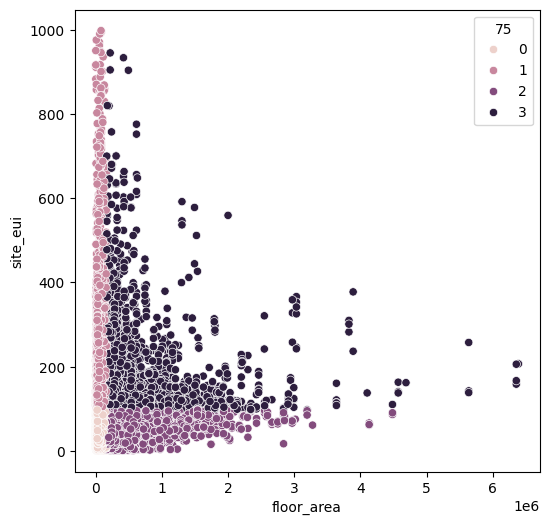

건물의 floor_area가 75% 이하인 그룹:
t-stat correlation:: 541.4197514972752, p-value: 0.0

건물의 floor_area가 75% 초과인 그룹:
t-stat correlation:: 149.1411769361525, p-value: 0.0


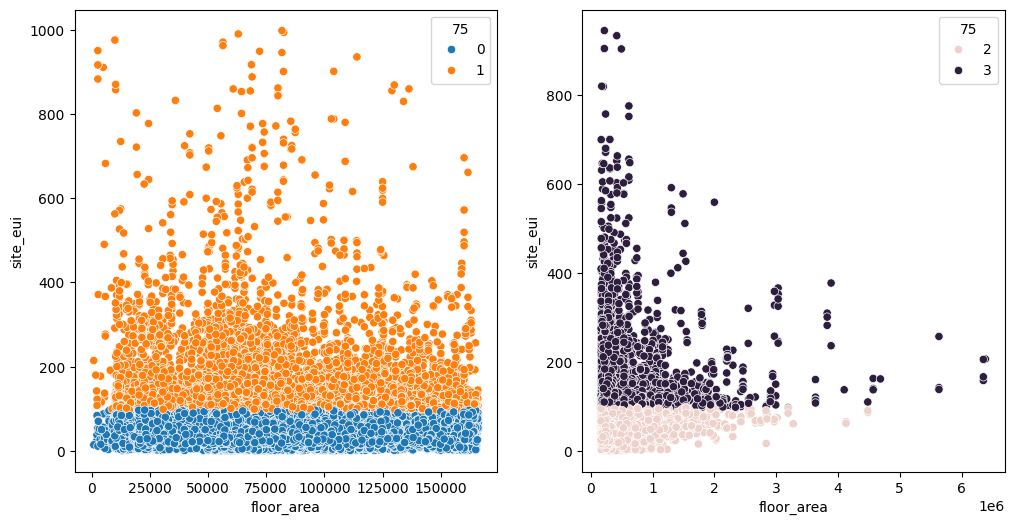

In [16]:
# 건물의 floor_area가 75% 이하인 그룹과 초과인 그룹으로 나눕니다.
data['75'] = (data['floor_area'] > data['floor_area'].quantile(0.75))*2 + \
    (data['site_eui'] > data['site_eui'].quantile(0.75))
under_75 = data[data['floor_area'] <= data['floor_area'].quantile(0.75)]
over_75 = data[data['floor_area'] > data['floor_area'].quantile(0.75)]

# 두 그룹 간의 상관관계를 계산합니다.
t, p = ttest_ind(under_75['site_eui'], over_75['site_eui'], equal_var=False)

# 결과 출력
print(f"t-stat correlation: {t}, p-value: {p} \n")

plt.figure(figsize=(6, 6))
sns.scatterplot(data=data, x='floor_area', y='site_eui', hue='75')
plt.show()


t1, p_value1 = ttest_ind(under_75['floor_area'], under_75['site_eui'], equal_var=False)
t2, p_value2 = ttest_ind(over_75['floor_area'], over_75['site_eui'], equal_var=False)

print("건물의 floor_area가 75% 이하인 그룹:")
print(f"t-stat correlation:: {t1}, p-value: {p_value1}")

print("\n건물의 floor_area가 75% 초과인 그룹:")
print(f"t-stat correlation:: {t2}, p-value: {p_value2}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=under_75, x='floor_area', y='site_eui', hue='75')

plt.subplot(1, 2, 2)
sns.scatterplot(data=over_75, x='floor_area', y='site_eui', hue='75')
plt.show()

<Axes: xlabel='floor_area', ylabel='site_eui'>

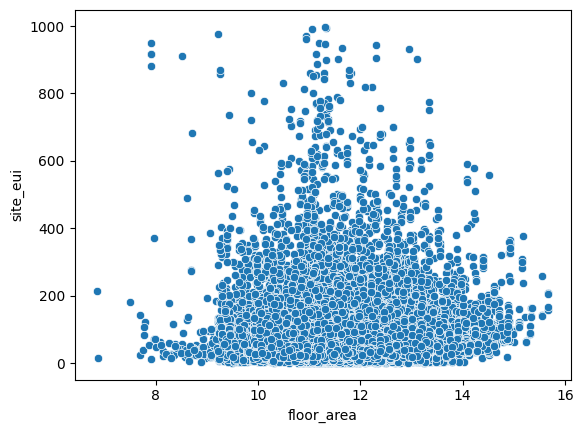

In [3]:
sns.scatterplot(x=np.log(data['floor_area']), y=data['site_eui'])

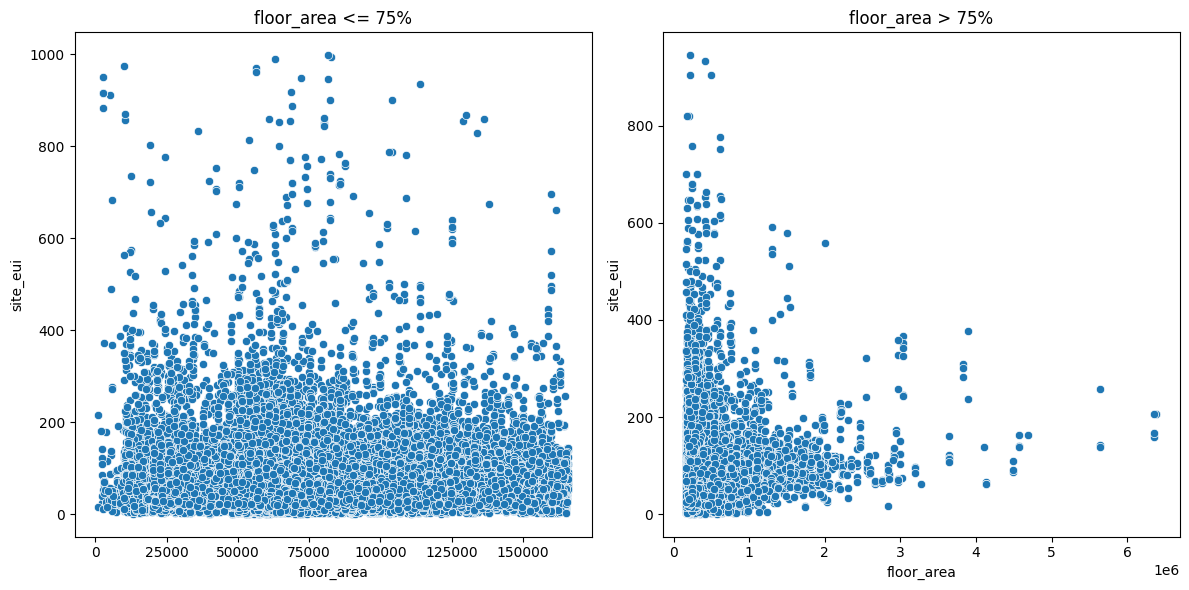

In [4]:
# 그래프 설정
plt.figure(figsize=(12, 6))

# 건물의 floor_area가 75% 이하인 그룹의 산점도 그리기
plt.subplot(1, 2, 1)
sns.scatterplot(data=under_75, x='floor_area', y='site_eui')
plt.title('floor_area <= 75%')


# 건물의 floor_area가 75% 초과인 그룹의 산점도 그리기
plt.subplot(1, 2, 2)
sns.scatterplot(data=over_75, x='floor_area', y='site_eui')
plt.title('floor_area > 75%')

plt.tight_layout()
plt.show()


In [5]:
print(under_75['floor_area'].max(), over_75['floor_area'].min())
print(under_75['site_eui'].max(), over_75['site_eui'].max())
print(under_75['site_eui'].min(), over_75['site_eui'].min())

166000.0 166005.0
997.8661202 944.8957064
1.001169302 1.196721312


C:\Users\r2com\AppData\Local\Temp\ipykernel_20796\543192356.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area_eui = data.groupby(['floor_area_range', 'site_eui_range'])[['floor_area', 'site_eui']].count()
C:\Users\r2com\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


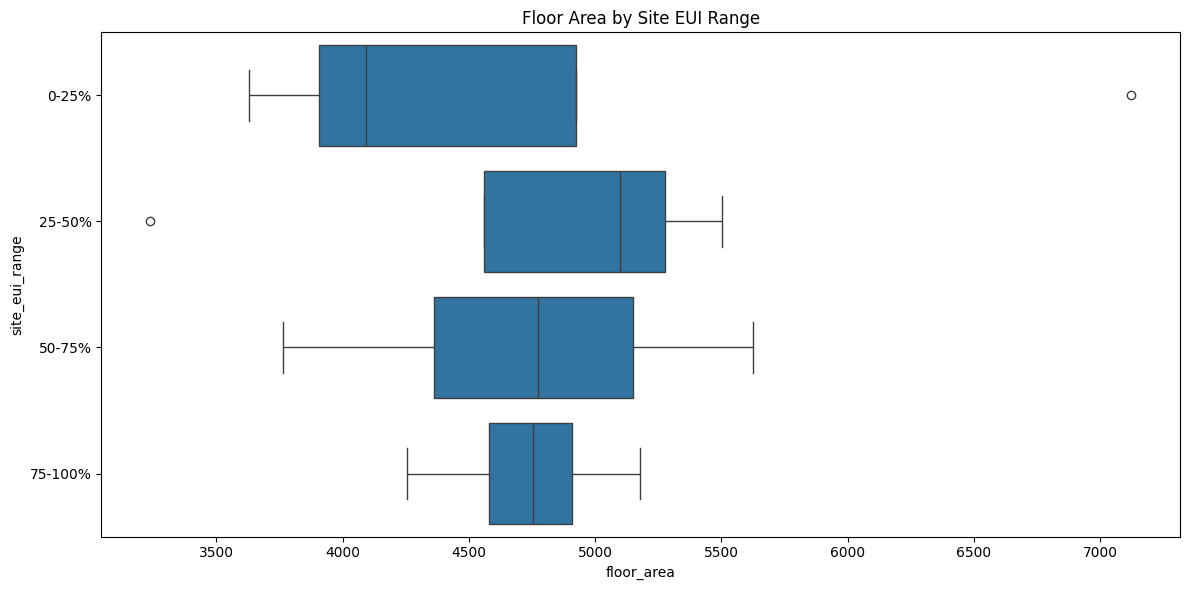

In [6]:
# 면적 기준 건물을 4 범위로 나누기
labels = ['0-25%', '25-50%', '50-75%', '75-100%']
data['floor_area_range'] = pd.qcut(data['floor_area'], q=4, labels=labels)
data['site_eui_range'] = pd.qcut(data['site_eui'], q=4, labels=labels)
area_eui = data.groupby(['floor_area_range', 'site_eui_range'])[['floor_area', 'site_eui']].count()

# 그래프 설정
plt.figure(figsize=(12, 6))

# site_eui 범위에 따른 건물의 면적 비율을 보는 그래프 그리기
sns.boxplot(data=area_eui, x='floor_area', y='site_eui_range')
plt.xlabel('floor_area')
plt.ylabel('site_eui_range')
plt.title('Floor Area by Site EUI Range')

plt.tight_layout()
plt.show()

C:\Users\r2com\AppData\Local\Temp\ipykernel_20796\1282642590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['rating/area'] = data_['energy_star_rating'] / np.log(data_['floor_area'] * data_['ELEVATION'])


Pearson correlation: -0.5089155548576482, p-value: 0.0 

건물의 floor_area가 75% 이하인 그룹:
Pearson correlation: -0.5192787124448897, p-value: 0.0

건물의 floor_area가 75% 초과인 그룹:
Pearson correlation: -0.4759328358733455, p-value: 0.0


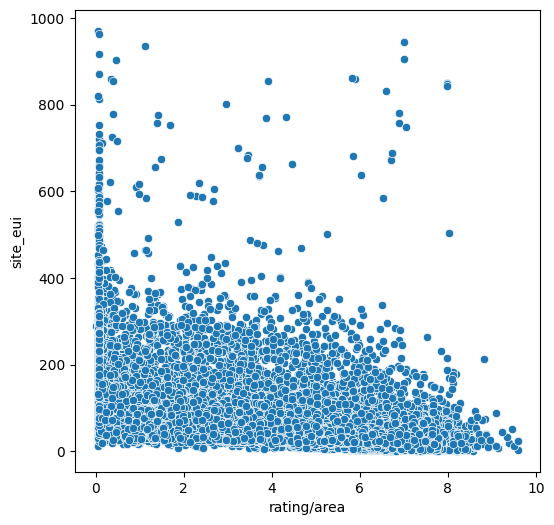

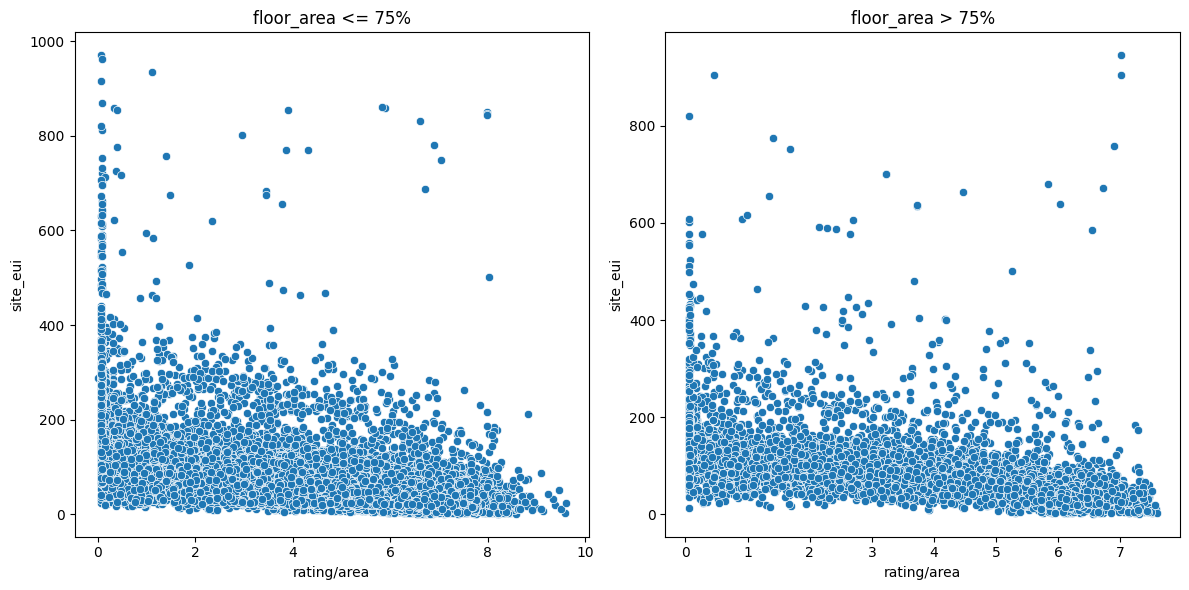

In [7]:
data_ = data.dropna(subset=['energy_star_rating'])

# 건물의 floor가 75% 이하인 그룹과 초과인 그룹으로 나눕니다.
data_['rating/area'] = data_['energy_star_rating'] / np.log(data_['floor_area'] * data_['ELEVATION'])
under_75 = data_[data_['floor_area'] <= data_['floor_area'].quantile(0.75)]
over_75 = data_[data_['floor_area'] > data_['floor_area'].quantile(0.75)]

# 두 그룹 간의 상관관계를 계산합니다.
corr0, p_value0 = pearsonr(data_['rating/area'], data_['site_eui'])
corr1, p_value1 = pearsonr((under_75['rating/area']), under_75['site_eui'])
corr2, p_value2 = pearsonr((over_75['rating/area']), over_75['site_eui'])

# 결과 출력
print(f"Pearson correlation: {corr0}, p-value: {p_value0} \n")

plt.figure(figsize=(6, 6))
sns.scatterplot(data=data_, x='rating/area', y='site_eui')

print("건물의 floor_area가 75% 이하인 그룹:")
print(f"Pearson correlation: {corr1}, p-value: {p_value1}")

print("\n건물의 floor_area가 75% 초과인 그룹:")
print(f"Pearson correlation: {corr2}, p-value: {p_value2}")


plt.figure(figsize=(12, 6))

# 건물의 floor_area가 75% 이하인 그룹의 산점도 그리기
plt.subplot(1, 2, 1)
sns.scatterplot(data=under_75, x='rating/area', y='site_eui')
plt.title('floor_area <= 75%')


# 건물의 floor_area가 75% 초과인 그룹의 산점도 그리기
plt.subplot(1, 2, 2)
sns.scatterplot(data=over_75, x='rating/area', y='site_eui')
plt.title('floor_area > 75%')

plt.tight_layout()
plt.show()


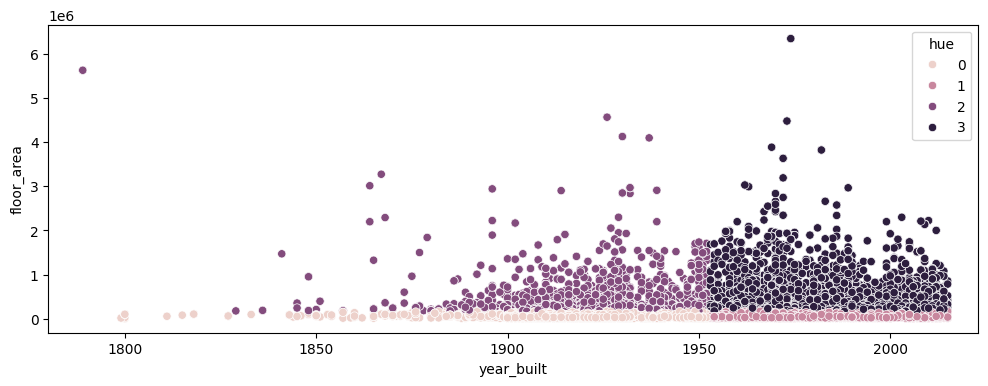

In [40]:
data['hue'] = (data['floor_area'] > data['floor_area'].quantile(0.75))*2 + \
    (data['year_built'] > 1952)

plt.figure(figsize=(12, 4))
sns.scatterplot(data=data, x='year_built', y='floor_area', hue='hue')
plt.xlim((1780, 2023))
plt.show()

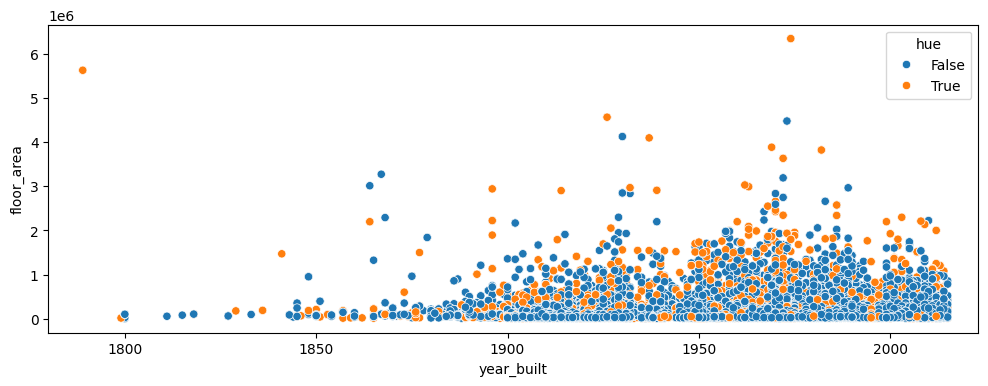

In [43]:
data['hue'] = (data['site_eui'] > data['site_eui'].quantile(0.75))

plt.figure(figsize=(12, 4))
sns.scatterplot(data=data, x='year_built', y='floor_area', hue='hue')
plt.xlim((1780, 2023))
plt.show()